<a href="https://colab.research.google.com/github/DhavaAdePratama/AnalisisSentimenStockbit/blob/main/AnalisisSentimenStockbit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [59]:
!pip install google-play-scraper

import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np
seed = 0
np.random.seed(seed)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score

import datetime as dt
import re
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

!pip install sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

from wordcloud import WordCloud

import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [60]:
# Mengimpor pustaka google_play_scraper untuk mengakses ulasan dan informasi aplikasi dari Google Play Store.
from google_play_scraper import app, reviews_all, Sort

# Mengambil semua ulasan dari aplikasi dengan ID ''com.levelinfinite.sgameGlobal' di Google Play Store.
# Proses scraping mungkin memerlukan beberapa saat tergantung pada jumlah ulasan yang ada.
scrapreview = reviews_all(
    'com.stockbit.android',          # ID aplikasi
    lang='id',             # Bahasa ulasan (default: 'en')
    country='id',          # Negara (default: 'us')
    sort=Sort.MOST_RELEVANT, # Urutan ulasan (default: Sort.MOST_RELEVANT)
    count=15000             # Jumlah maksimum ulasan yang ingin diambil
)

In [61]:
# Menyimpan ulasan dalam file CSV
import csv

with open('stockbit_reviews.csv', mode='w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    writer.writerow(['Review'])  # Menulis header kolom
    for review in scrapreview:
        writer.writerow([review['content']])

In [62]:
app_reviews_df = pd.DataFrame(scrapreview)
app_reviews_df.shape
app_reviews_df.head()
app_reviews_df.to_csv('stockbit_reviews.csv', index=False)

# Membuat DataFrame dari hasil scrapreview
app_reviews_df = pd.DataFrame(scrapreview)

# Menghitung jumlah baris dan kolom dalam DataFrame
jumlah_ulasan, jumlah_kolom = app_reviews_df.shape

In [63]:
app_reviews_df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,65119d43-3a86-47cb-a615-4c50934ac520,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Charting masih pinjam punya tradingview. Indik...,1,22,2.33.6,2025-01-27 13:55:12,"Halo Kak Adde,\n\nMohon maaf atas ketidaknyama...",2025-01-30 04:07:47,2.33.6
1,ee9ace9e-63d5-4b28-a510-4e55cd70ebb9,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Kelebihan : Chat Support cepat dijawab dan dil...,4,11,2.33.5,2025-01-10 04:29:09,"Halo kak Aufa,\n\nJika ""memperoleh penjatahan ...",2025-01-08 08:33:50,2.33.5
2,5e8f7fb6-3f2f-42cd-9236-ae11f861bdee,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"setelah update aplikasi kenapa bagian ""portfol...",3,9,2.33.5,2025-01-20 04:38:10,"Halo kak Antagonis,\n\nMohon maaf atas ketidak...",2025-01-21 11:46:55,2.33.5
3,82c53b14-b7b2-437f-8ec3-d765dea52e07,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Aplikasi nya bagus, fitur lengkap, tampilannya...",4,6,2.33.3,2025-01-02 02:56:13,"Halo Dodi,\n\nKami senang baca review positif ...",2025-01-02 14:59:20,2.33.3
4,9a3e3f61-53ed-47b9-bbc3-873d0e89fb13,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,oke banget. fitur2nya saya suka. hanya untuk t...,5,22,2.33.4,2025-01-02 02:54:49,"Halo kak Oberlin,\n\nTerima kasih atas saran d...",2025-01-02 14:56:09,2.33.4


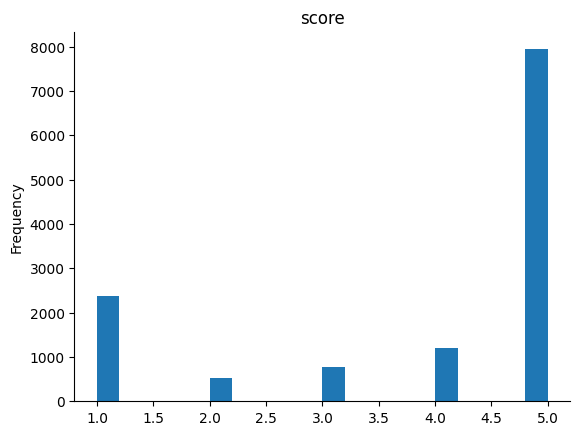

In [64]:
# score
app_reviews_df['score'].plot(kind='hist', bins=20, title='score')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [65]:
app_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12788 entries, 0 to 12787
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   reviewId              12788 non-null  object        
 1   userName              12788 non-null  object        
 2   userImage             12788 non-null  object        
 3   content               12788 non-null  object        
 4   score                 12788 non-null  int64         
 5   thumbsUpCount         12788 non-null  int64         
 6   reviewCreatedVersion  10877 non-null  object        
 7   at                    12788 non-null  datetime64[ns]
 8   replyContent          9984 non-null   object        
 9   repliedAt             9984 non-null   datetime64[ns]
 10  appVersion            10877 non-null  object        
dtypes: datetime64[ns](2), int64(2), object(7)
memory usage: 1.1+ MB


In [66]:
clean_df = app_reviews_df.dropna()
clean_df = clean_df.drop_duplicates()
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8419 entries, 0 to 12112
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   reviewId              8419 non-null   object        
 1   userName              8419 non-null   object        
 2   userImage             8419 non-null   object        
 3   content               8419 non-null   object        
 4   score                 8419 non-null   int64         
 5   thumbsUpCount         8419 non-null   int64         
 6   reviewCreatedVersion  8419 non-null   object        
 7   at                    8419 non-null   datetime64[ns]
 8   replyContent          8419 non-null   object        
 9   repliedAt             8419 non-null   datetime64[ns]
 10  appVersion            8419 non-null   object        
dtypes: datetime64[ns](2), int64(2), object(7)
memory usage: 789.3+ KB


In [67]:
#PREPROCESSING

def cleaningText(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) # remove mentions
    text = re.sub(r'#[A-Za-z0-9]+', '', text) # remove hashtag
    text = re.sub(r'RT[\s]', '', text) # remove RT
    text = re.sub(r"http\S+", '', text) # remove link
    text = re.sub(r'[0-9]+', '', text) # remove numbers
    text = re.sub(r'[^\w\s]', '', text) # remove numbers


    text = text.replace('\n', ' ') # replace new line into space
    text = text.translate(str.maketrans('', '', string.punctuation)) # remove all punctuations
    text = text.strip(' ') # remove characters space from both left and right text
    return text

def casefoldingText(text): # Converting all the characters in a text into lower case
    text = text.lower()
    return text

def tokenizingText(text): # Tokenizing or splitting a string, text into a list of tokens
    text = word_tokenize(text)
    return text

def filteringText(text): # Remove stopwors in a text
    listStopwords = set(stopwords.words('indonesian'))
    listStopwords1 = set(stopwords.words('english'))
    listStopwords.update(listStopwords1)
    listStopwords.update(['iya','yaa','gak','nya','na','sih','ku',"di","ga","ya","gaa","loh","kah","woi","woii","woy"])
    filtered = []
    for txt in text:
        if txt not in listStopwords:
            filtered.append(txt)
    text = filtered
    return text

def stemmingText(text): # Reducing a word to its word stem that affixes to suffixes and prefixes or to the roots of words
    # Membuat objek stemmer
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()

    # Memecah teks menjadi daftar kata
    words = text.split()

    # Menerapkan stemming pada setiap kata dalam daftar
    stemmed_words = [stemmer.stem(word) for word in words]

    # Menggabungkan kata-kata yang telah distem
    stemmed_text = ' '.join(stemmed_words)

    return stemmed_text

    return stemmed_text

def toSentence(list_words): # Convert list of words into sentence
    sentence = ' '.join(word for word in list_words)
    return sentence


In [68]:
slangwords = {"@": "di", "abis": "habis", "wtb": "beli", "masi": "masih", "wts": "jual", "wtt": "tukar", "bgt": "banget", "maks": "maksimal"}
def fix_slangwords(text):
    words = text.split()
    fixed_words = []

    for word in words:
        if word.lower() in slangwords:
            fixed_words.append(slangwords[word.lower()])
        else:
            fixed_words.append(word)

    fixed_text = ' '.join(fixed_words)
    return fixed_text


In [69]:
clean_df

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,65119d43-3a86-47cb-a615-4c50934ac520,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Charting masih pinjam punya tradingview. Indik...,1,22,2.33.6,2025-01-27 13:55:12,"Halo Kak Adde,\n\nMohon maaf atas ketidaknyama...",2025-01-30 04:07:47,2.33.6
1,ee9ace9e-63d5-4b28-a510-4e55cd70ebb9,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Kelebihan : Chat Support cepat dijawab dan dil...,4,11,2.33.5,2025-01-10 04:29:09,"Halo kak Aufa,\n\nJika ""memperoleh penjatahan ...",2025-01-08 08:33:50,2.33.5
2,5e8f7fb6-3f2f-42cd-9236-ae11f861bdee,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"setelah update aplikasi kenapa bagian ""portfol...",3,9,2.33.5,2025-01-20 04:38:10,"Halo kak Antagonis,\n\nMohon maaf atas ketidak...",2025-01-21 11:46:55,2.33.5
3,82c53b14-b7b2-437f-8ec3-d765dea52e07,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Aplikasi nya bagus, fitur lengkap, tampilannya...",4,6,2.33.3,2025-01-02 02:56:13,"Halo Dodi,\n\nKami senang baca review positif ...",2025-01-02 14:59:20,2.33.3
4,9a3e3f61-53ed-47b9-bbc3-873d0e89fb13,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,oke banget. fitur2nya saya suka. hanya untuk t...,5,22,2.33.4,2025-01-02 02:54:49,"Halo kak Oberlin,\n\nTerima kasih atas saran d...",2025-01-02 14:56:09,2.33.4
...,...,...,...,...,...,...,...,...,...,...,...
12067,b5db97c3-3074-48ba-8763-5a912fcc41b1,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Aplikasinya sekarang jadi sangat jelek setelah...,1,0,1.7.6,2018-03-15 08:26:31,Silahkan diupgrade dan dicoba kembali.,2018-04-26 04:53:21,1.7.6
12077,820f9503-ce34-4a13-906d-929983012dfd,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Parah ga bisa login...padahal udah masukkin em...,1,3,1.7.2,2018-01-13 01:27:27,"Hi Andi DM, \nMohon maaf untuk gangguannya. Bi...",2018-01-13 03:58:15,1.7.2
12083,ebee6760-622f-48f5-ad25-8c8b7c97919e,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"terimakasih atas bantuannya, yang ada masalah ...",5,1,1.6.2,2017-12-19 02:20:11,Silahkan logout dan login kembali.,2017-12-19 01:20:29,1.6.2
12110,f3c816c7-bb8a-4339-b794-5f31b3a33b4f,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,I am really pissed off with the bug when u cli...,3,1,1.5.0,2017-03-18 09:46:29,"Hi Naufal,\nThank you for your feedback. Some ...",2017-03-21 05:04:37,1.5.0


In [70]:
import nltk
nltk.download('punkt_tab')

# Membersihkan teks dan menyimpannya di kolom 'text_clean'
clean_df['text_clean'] = clean_df['content'].apply(cleaningText)

# Mengubah huruf dalam teks menjadi huruf kecil dan menyimpannya di 'text_casefoldingText'
clean_df['text_casefoldingText'] = clean_df['text_clean'].apply(casefoldingText)

# Mengganti kata-kata slang dengan kata-kata standar dan menyimpannya di 'text_slangwords'
clean_df['text_slangwords'] = clean_df['text_casefoldingText'].apply(fix_slangwords)

# Memecah teks menjadi token (kata-kata) dan menyimpannya di 'text_tokenizingText'
clean_df['text_tokenizingText'] = clean_df['text_slangwords'].apply(tokenizingText)

# Menghapus kata-kata stop (kata-kata umum) dan menyimpannya di 'text_stopword'
clean_df['text_stopword'] = clean_df['text_tokenizingText'].apply(filteringText)

# Menggabungkan token-token menjadi kalimat dan menyimpannya di 'text_akhir'
clean_df['text_akhir'] = clean_df['text_stopword'].apply(toSentence)

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [71]:
clean_df

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,text_clean,text_casefoldingText,text_slangwords,text_tokenizingText,text_stopword,text_akhir
0,65119d43-3a86-47cb-a615-4c50934ac520,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Charting masih pinjam punya tradingview. Indik...,1,22,2.33.6,2025-01-27 13:55:12,"Halo Kak Adde,\n\nMohon maaf atas ketidaknyama...",2025-01-30 04:07:47,2.33.6,Charting masih pinjam punya tradingview Indika...,charting masih pinjam punya tradingview indika...,charting masih pinjam punya tradingview indika...,"[charting, masih, pinjam, punya, tradingview, ...","[charting, pinjam, tradingview, indikator, par...",charting pinjam tradingview indikator parah da...
1,ee9ace9e-63d5-4b28-a510-4e55cd70ebb9,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Kelebihan : Chat Support cepat dijawab dan dil...,4,11,2.33.5,2025-01-10 04:29:09,"Halo kak Aufa,\n\nJika ""memperoleh penjatahan ...",2025-01-08 08:33:50,2.33.5,Kelebihan Chat Support cepat dijawab dan dila...,kelebihan chat support cepat dijawab dan dila...,kelebihan chat support cepat dijawab dan dilay...,"[kelebihan, chat, support, cepat, dijawab, dan...","[kelebihan, chat, support, cepat, dilayani, re...",kelebihan chat support cepat dilayani receh ke...
2,5e8f7fb6-3f2f-42cd-9236-ae11f861bdee,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"setelah update aplikasi kenapa bagian ""portfol...",3,9,2.33.5,2025-01-20 04:38:10,"Halo kak Antagonis,\n\nMohon maaf atas ketidak...",2025-01-21 11:46:55,2.33.5,setelah update aplikasi kenapa bagian portfoli...,setelah update aplikasi kenapa bagian portfoli...,setelah update aplikasi kenapa bagian portfoli...,"[setelah, update, aplikasi, kenapa, bagian, po...","[update, aplikasi, portfolio, loading, trs, bu...",update aplikasi portfolio loading trs butuh me...
3,82c53b14-b7b2-437f-8ec3-d765dea52e07,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Aplikasi nya bagus, fitur lengkap, tampilannya...",4,6,2.33.3,2025-01-02 02:56:13,"Halo Dodi,\n\nKami senang baca review positif ...",2025-01-02 14:59:20,2.33.3,Aplikasi nya bagus fitur lengkap tampilannya j...,aplikasi nya bagus fitur lengkap tampilannya j...,aplikasi nya bagus fitur lengkap tampilannya j...,"[aplikasi, nya, bagus, fitur, lengkap, tampila...","[aplikasi, bagus, fitur, lengkap, tampilannya,...",aplikasi bagus fitur lengkap tampilannya keren...
4,9a3e3f61-53ed-47b9-bbc3-873d0e89fb13,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,oke banget. fitur2nya saya suka. hanya untuk t...,5,22,2.33.4,2025-01-02 02:54:49,"Halo kak Oberlin,\n\nTerima kasih atas saran d...",2025-01-02 14:56:09,2.33.4,oke banget fiturnya saya suka hanya untuk trad...,oke banget fiturnya saya suka hanya untuk trad...,oke banget fiturnya saya suka hanya untuk trad...,"[oke, banget, fiturnya, saya, suka, hanya, unt...","[oke, banget, fiturnya, suka, trading, cepat, ...",oke banget fiturnya suka trading cepat maksimu...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12067,b5db97c3-3074-48ba-8763-5a912fcc41b1,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Aplikasinya sekarang jadi sangat jelek setelah...,1,0,1.7.6,2018-03-15 08:26:31,Silahkan diupgrade dan dicoba kembali.,2018-04-26 04:53:21,1.7.6,Aplikasinya sekarang jadi sangat jelek setelah...,aplikasinya sekarang jadi sangat jelek setelah...,aplikasinya sekarang jadi sangat jelek setelah...,"[aplikasinya, sekarang, jadi, sangat, jelek, s...","[aplikasinya, jelek, upgrade, force, close, mu...",aplikasinya jelek upgrade force close mulujadi...
12077,820f9503-ce34-4a13-906d-929983012dfd,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Parah ga bisa login...padahal udah masukkin em...,1,3,1.7.2,2018-01-13 01:27:27,"Hi Andi DM, \nMohon maaf untuk gangguannya. Bi...",2018-01-13 03:58:15,1.7.2,Parah ga bisa loginpadahal udah masukkin em

In [72]:
import csv
import requests
from io import StringIO

# Membaca data kamus kata-kata positif dari GitHub
lexicon_positive = dict()

response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_positive.csv')
# Mengirim permintaan HTTP untuk mendapatkan file CSV dari GitHub

if response.status_code == 200:
    # Jika permintaan berhasil
    reader = csv.reader(StringIO(response.text), delimiter=',')
    # Membaca teks respons sebagai file CSV menggunakan pembaca CSV dengan pemisah koma

    for row in reader:
        # Mengulangi setiap baris dalam file CSV
        lexicon_positive[row[0]] = int(row[1])
        # Menambahkan kata-kata positif dan skornya ke dalam kamus lexicon_positive
else:
    print("Failed to fetch positive lexicon data")

# Membaca data kamus kata-kata negatif dari GitHub
lexicon_negative = dict()

response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_negative.csv')
# Mengirim permintaan HTTP untuk mendapatkan file CSV dari GitHub

if response.status_code == 200:
    # Jika permintaan berhasil
    reader = csv.reader(StringIO(response.text), delimiter=',')
    # Membaca teks respons sebagai file CSV menggunakan pembaca CSV dengan pemisah koma

    for row in reader:
        # Mengulangi setiap baris dalam file CSV
        lexicon_negative[row[0]] = int(row[1])
        # Menambahkan kata-kata negatif dan skornya dalam kamus lexicon_negative
else:
    print("Failed to fetch negative lexicon data")

In [73]:
# Fungsi untuk menentukan polaritas sentimen dari tweet

def sentiment_analysis_lexicon_indonesia(text):
    #for word in text:

    score = 0
    # Inisialisasi skor sentimen ke 0

    for word in text:
        # Mengulangi setiap kata dalam teks

        if (word in lexicon_positive):
            score = score + lexicon_positive[word]
            # Jika kata ada dalam kamus positif, tambahkan skornya ke skor sentimen

    for word in text:
        # Mengulangi setiap kata dalam teks (sekali lagi)

        if (word in lexicon_negative):
            score = score + lexicon_negative[word]
            # Jika kata ada dalam kamus negatif, kurangkan skornya dari skor sentimen

    polarity=''
    # Inisialisasi variabel polaritas

    if (score > 0):
        polarity = 'positive'
        # Jika skor sentimen lebih besar atau sama dengan 0, maka polaritas adalah positif
    elif (score < 0):
        polarity = 'negative'
        # Jika skor sentimen kurang dari 0, maka polaritas adalah negatif
    else:
        polarity = 'neutral'
        # Jika skor sentimen sama dengan 0, maka polaritas adalah netral


    # Ini adalah bagian yang bisa digunakan untuk menentukan polaritas netral jika diperlukan

    return score, polarity
    # Mengembalikan skor sentimen dan polaritas teks

polarity
positive    3836
negative    2754
neutral     1829
Name: count, dtype: int64


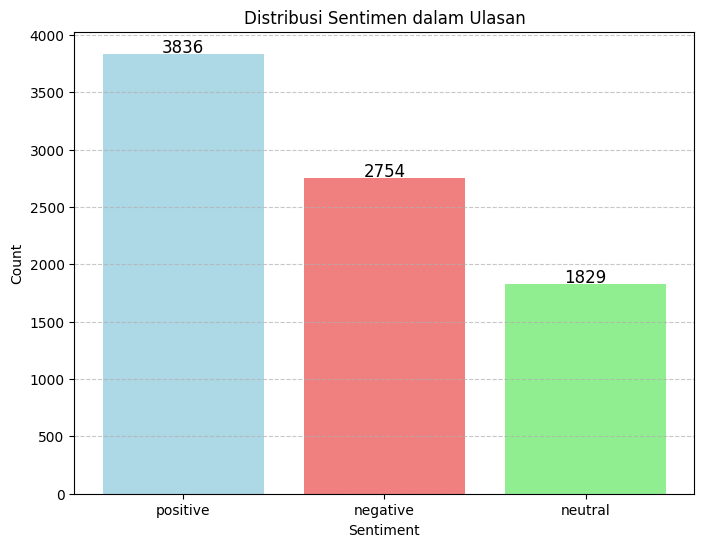

In [74]:
results = clean_df['text_stopword'].apply(sentiment_analysis_lexicon_indonesia)
results = list(zip(*results))
clean_df['polarity_score'] = results[0]
clean_df['polarity'] = results[1]
print(clean_df['polarity'].value_counts())

# Hitung jumlah masing-masing kategori sentimen
sentiment_counts = clean_df['polarity'].value_counts()

# Warna untuk setiap kategori
colors = ['lightblue', 'lightcoral', 'lightgreen']

# Membuat bar chart
plt.figure(figsize=(8, 6))
plt.bar(sentiment_counts.index, sentiment_counts.values, color=colors)
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Distribusi Sentimen dalam Ulasan')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Menampilkan jumlah di atas tiap bar
for i, v in enumerate(sentiment_counts.values):
    plt.text(i, v + 10, str(v), ha='center', fontsize=12)

plt.show()


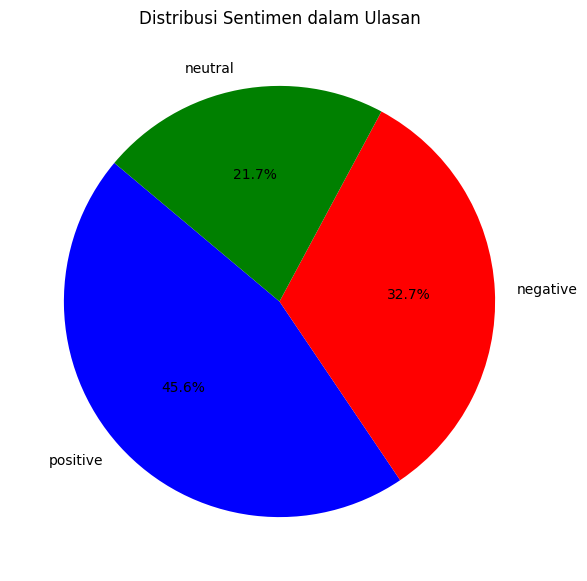

In [75]:

# Hitung jumlah masing-masing kategori sentimen
sentiment_counts = clean_df['polarity'].value_counts()

colors = ['blue', 'red', 'green']

plt.figure(figsize=(7, 7))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', colors=colors, startangle=140)
plt.title('Distribusi Sentimen dalam Ulasan')
plt.show()

In [76]:
clean_df = clean_df.drop(columns=['reviewId',	'userName',	'userImage',	'content',	'score',	'thumbsUpCount',	'reviewCreatedVersion',	'at',	'replyContent',	'repliedAt',	'appVersion',	'text_clean',	'text_casefoldingText',	'text_slangwords',	'text_tokenizingText',	'text_stopword'])
clean_df.head()

,text_akhir,polarity_score,polarity
0,charting pinjam tradingview indikator parah da...,-20,negative
1,kelebihan chat support cepat dilayani receh ke...,2,positive
2,update aplikasi portfolio loading trs butuh me...,-17,negative
3,aplikasi bagus fitur lengkap tampilannya keren...,-9,negative
4,oke banget fiturnya suka trading cepat maksimu...,12,positive


In [77]:
clean_df.to_csv("sentiment results", index=False)

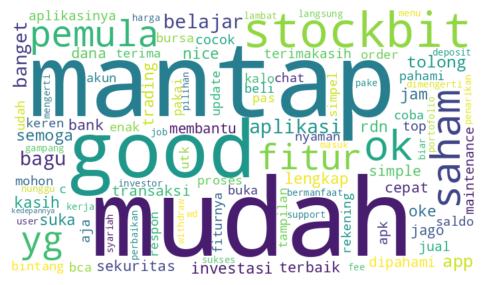

In [78]:
# Ensure 'Positive' matches the case in your DataFrame
new_df = clean_df[clean_df['polarity'] == 'positive']

# Check if new_df is empty and handle it
if new_df.empty:
    print("No positive reviews found. Cannot generate word cloud.")
else:
    words = ' '.join(new_df['text_akhir'])
    wordcloud = WordCloud(stopwords=STOPWORDS,
                          background_color='white',
                          width=700, height=400, max_words=100, collocations=False
                         ).generate(words)
    plt.figure(figsize=(6, 6))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()

POSITIF

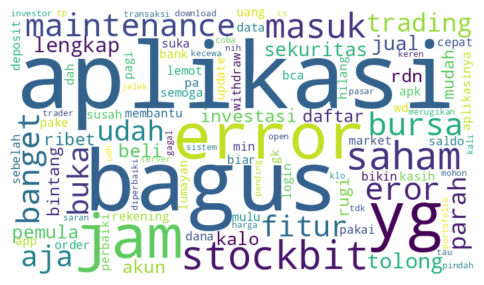

In [79]:
# Ensure 'Positive' matches the case in your DataFrame
new_df = clean_df[clean_df['polarity'] == 'negative']

# Check if new_df is empty and handle it
if new_df.empty:
    print("No positive reviews found. Cannot generate word cloud.")
else:
    words = ' '.join(new_df['text_akhir'])
    wordcloud = WordCloud(stopwords=STOPWORDS,
                          background_color='white',
                          width=700, height=400, max_words=100, collocations=False
                         ).generate(words)
    plt.figure(figsize=(6, 6))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()

NEGATIF

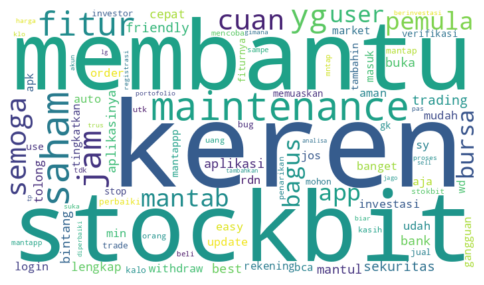

In [80]:
# Ensure 'Positive' matches the case in your DataFrame
new_df = clean_df[clean_df['polarity'] == 'neutral']

# Check if new_df is empty and handle it
if new_df.empty:
    print("No positive reviews found. Cannot generate word cloud.")
else:
    words = ' '.join(new_df['text_akhir'])
    wordcloud = WordCloud(stopwords=STOPWORDS,
                          background_color='white',
                          width=700, height=400, max_words=100, collocations=False
                         ).generate(words)
    plt.figure(figsize=(6, 6))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()

<ipython-input-81-07a2717ff721>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_words.values, y=top_words.index, palette='viridis')


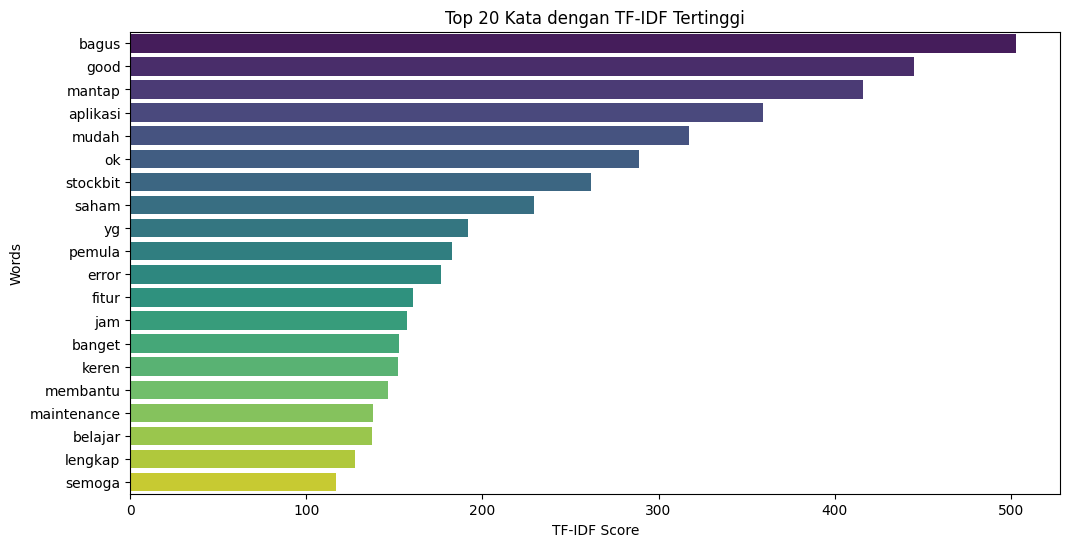

In [81]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import seaborn as sns

# Pisahkan data menjadi fitur (tweet) dan label (sentimen)
X = clean_df['text_akhir']
y = clean_df['polarity']

# Ekstraksi fitur dengan TF-IDF
tfidf = TfidfVectorizer(max_features=200, min_df=17, max_df=0.8 )
X_tfidf = tfidf.fit_transform(X)

# Konversi hasil ekstraksi fitur menjadi dataframe
features_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf.get_feature_names_out())

# Ambil 20 kata dengan skor TF-IDF tertinggi
top_words = features_df.sum().sort_values(ascending=False).head(20)

# Plot bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=top_words.values, y=top_words.index, palette='viridis')
plt.xlabel('TF-IDF Score')
plt.ylabel('Words')
plt.title('Top 20 Kata dengan TF-IDF Tertinggi')
plt.show()


In [82]:
from sklearn.ensemble import RandomForestClassifier

# Bagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.3, random_state=42)

# Membuat objek model Random Forest
random_forest = RandomForestClassifier()

# Melatih model Random Forest pada data pelatihan
random_forest.fit(X_train.toarray(), y_train)

# Prediksi sentimen pada data pelatihan dan data uji
y_pred_train_rf = random_forest.predict(X_train.toarray())
y_pred_test_rf = random_forest.predict(X_test.toarray())

# Evaluasi akurasi model Random Forest
accuracy_train_rf = accuracy_score(y_pred_train_rf, y_train)
accuracy_test_rf = accuracy_score(y_pred_test_rf, y_test)

# Menampilkan akurasi
print('Random Forest - accuracy_train:', accuracy_train_rf)
print('Random Forest - accuracy_test:', accuracy_test_rf)

Random Forest - accuracy_train: 0.9463770575258782
Random Forest - accuracy_test: 0.8198733174980206
